In [20]:
import os 
from dotenv import load_dotenv

load_dotenv() # load environment variables from .env file
# change the current working directory to the directory of the project 
os.chdir(os.getenv("WORKSPACE_DIR"))
print(os.getcwd())

import pysewer
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

myfmt = DateFormatter('%m.%y')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial','Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana']
plt.rcParams['font.size'] = 15
plt.rcParams['axes.labelsize'] = 17
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 17
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 13
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['xtick.major.pad'] = 5  # distance to major tick label in points

/Users/despot/Nextcloud/Cloud/Python_Projects/pysewer


In [3]:
# import the required data from generating the sewer network 
dem_file = "./data/first_test_area/dem.tif"
#dem_file = False
buildings_file = "./data/first_test_area/buildings.shp"
roads_file = "./data/first_test_area/roads.shp"
pipe_diameters = [0.2,0.3,0.4,0.5,0.8,1,2]
pressurized_diam = 0.2



This is current CRS of the roads:  {<Projected CRS: EPSG:5490>
Name: RGAF09 / UTM zone 20N
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 20N
- method: Transverse Mercator
Datum: Reseau Geodesique des Antilles Francaises 2009
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
}
This is current CRS of the roads:  {<Projected CRS: EPSG:32620>
Name: WGS 84 / UTM zone 20N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 66°W and 60°W, northern hemisphere between equator and 84°N, onshore and offshore. Anguilla. Antigua and Barbuda. Bermuda. Brazil. British Virgin Islands. Canada - New Brunswick; Labrador; Nova Scotia; Nunavut; Prince Edward Island; Quebec. Dominica. Greenland. Grenada. Guadeloupe. Guyana. Martinique. Montserrat. Puerto Rico. St Kitts and Nevis. St Lucia. St Vncent and the Grenadines. Trinidad and Tobago. Venezuela. US Virgi

<Axes: >

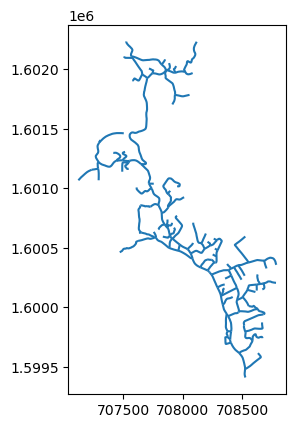

In [4]:
# Lets look at the roads
roads = pysewer.Roads(roads_file)
# import the roads using geopandas
# roads_gdf = gpd.read_file(roads_file)
roads_gdf = roads.get_gdf()

# print the out the CRS of the roads
print(f"This is current CRS of the roads: ", {roads_gdf.crs})

roads_gdf.to_crs(epsg=32620, inplace=True)
# print the out the CRS of the roads
print(f"This is current CRS of the roads: ", {roads_gdf.crs})
roads_gdf.plot()


This is current CRS of the buildings:  {<Projected CRS: EPSG:5490>
Name: RGAF09 / UTM zone 20N
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 20N
- method: Transverse Mercator
Datum: Reseau Geodesique des Antilles Francaises 2009
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
}


<Axes: >

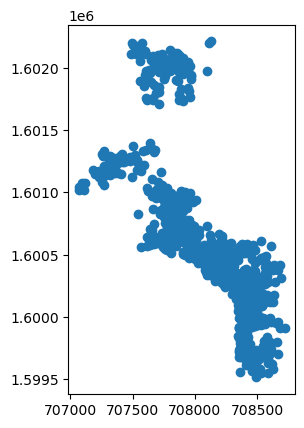

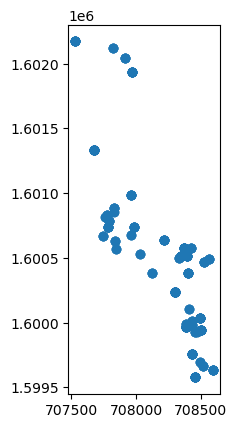

In [5]:
# lets look at the buildings
buildings = pysewer.Buildings(buildings_file, roads_obj=roads)

# print the out the CRS of the buildings
print(f"This is current CRS of the buildings: ", {buildings.get_gdf().crs})

# get the building gdf
buildings_gdf = buildings.get_gdf()
buildings_gdf.to_crs(epsg=32620, inplace=True)

# convert the geometry polygon to point
buildings_gdf["geometry"] = buildings_gdf["geometry"].centroid
buildings_gdf.plot()

# get the building cluster centers
building_cluster = buildings.cluster_centers(max_connection_length=20)
# plot the building cluster
building_cluster.plot()


In [6]:
test_model_domain = pysewer.ModelDomain(dem=dem_file,buildings=buildings_gdf,roads=roads_gdf,clustering="sequ")

/Users/despot/miniconda3/envs/pysewer/lib/python3.10/site-packages/shapely/linear.py:208: RuntimeWarning: invalid value encountered in shortest_line
  return lib.shortest_line(a, b, **kwargs)
/Users/despot/miniconda3/envs/pysewer/lib/python3.10/site-packages/shapely/linear.py:208: RuntimeWarning: invalid value encountered in shortest_line
  return lib.shortest_line(a, b, **kwargs)
/Users/despot/miniconda3/envs/pysewer/lib/python3.10/site-packages/shapely/linear.py:208: RuntimeWarning: invalid value encountered in shortest_line
  return lib.shortest_line(a, b, **kwargs)
/Users/despot/miniconda3/envs/pysewer/lib/python3.10/site-packages/shapely/linear.py:208: RuntimeWarning: invalid value encountered in shortest_line
  return lib.shortest_line(a, b, **kwargs)
/Users/despot/miniconda3/envs/pysewer/lib/python3.10/site-packages/shapely/linear.py:208: RuntimeWarning: invalid value encountered in shortest_line
  return lib.shortest_line(a, b, **kwargs)
/Users/despot/miniconda3/envs/pysewer/li

In [7]:
test_model_domain.set_sink_lowest()
test_model_domain.get_sinks()

[(708006.2999997857, 1601773.300051143)]

/Users/despot/miniconda3/envs/pysewer/lib/python3.10/site-packages/earthpy/spatial.py:556: RuntimeWarning: invalid value encountered in cast
  return (bytedata.clip(low, high) + 0.5).astype("uint8")


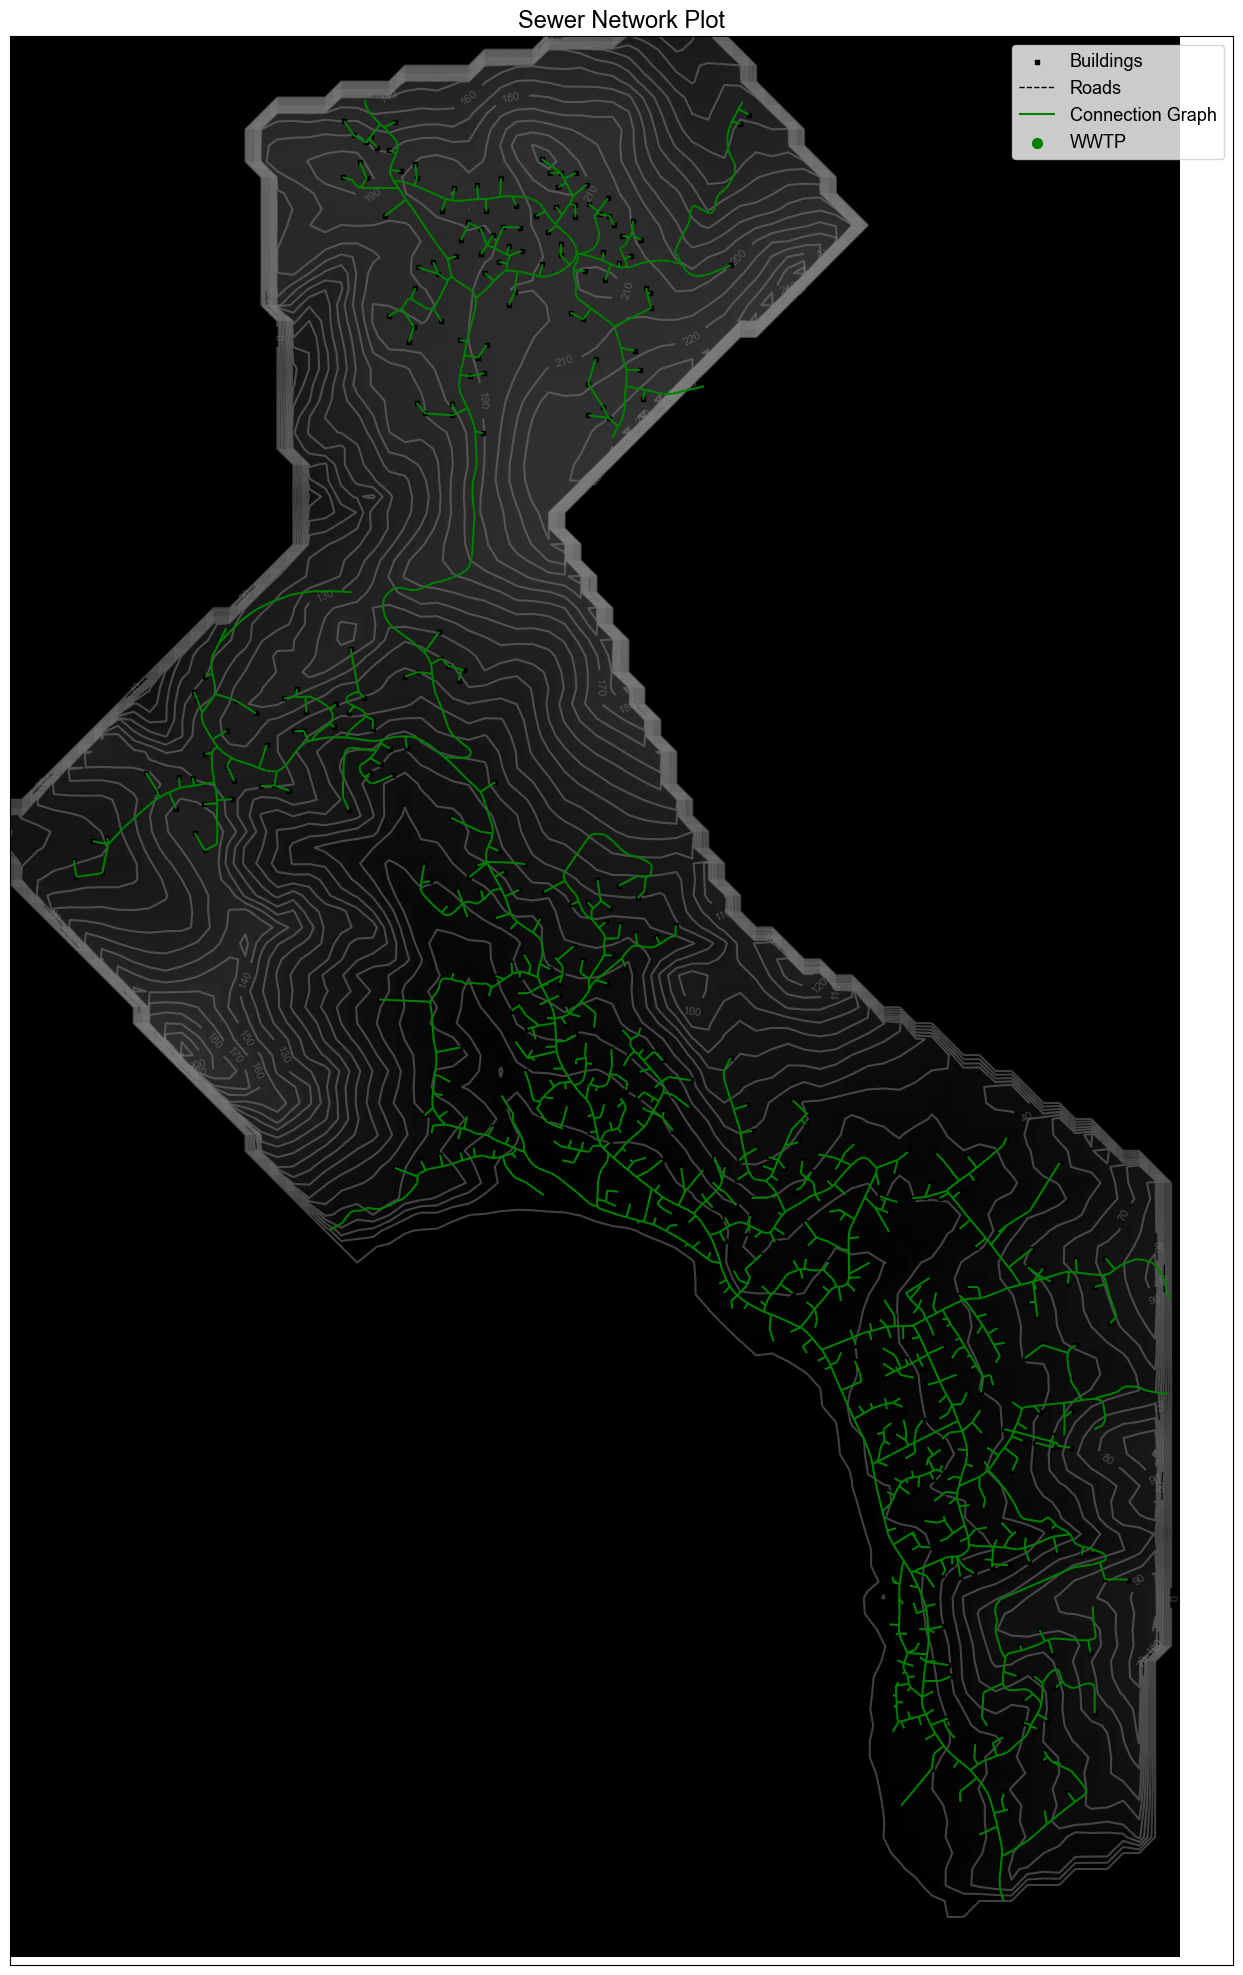

In [28]:
fig,ax = pysewer.plot_model_domain(test_model_domain,plot_connection_graph=True,hillshade=True)
fig.tight_layout()
fig.savefig("./data/figures/graph_route_area1.png",dpi=500)

In [9]:
connection_graph = test_model_domain.generate_connection_graph()

2371
1280
Simplified graph: 2371 to 1264 nodes, 2796 to 1689 edges


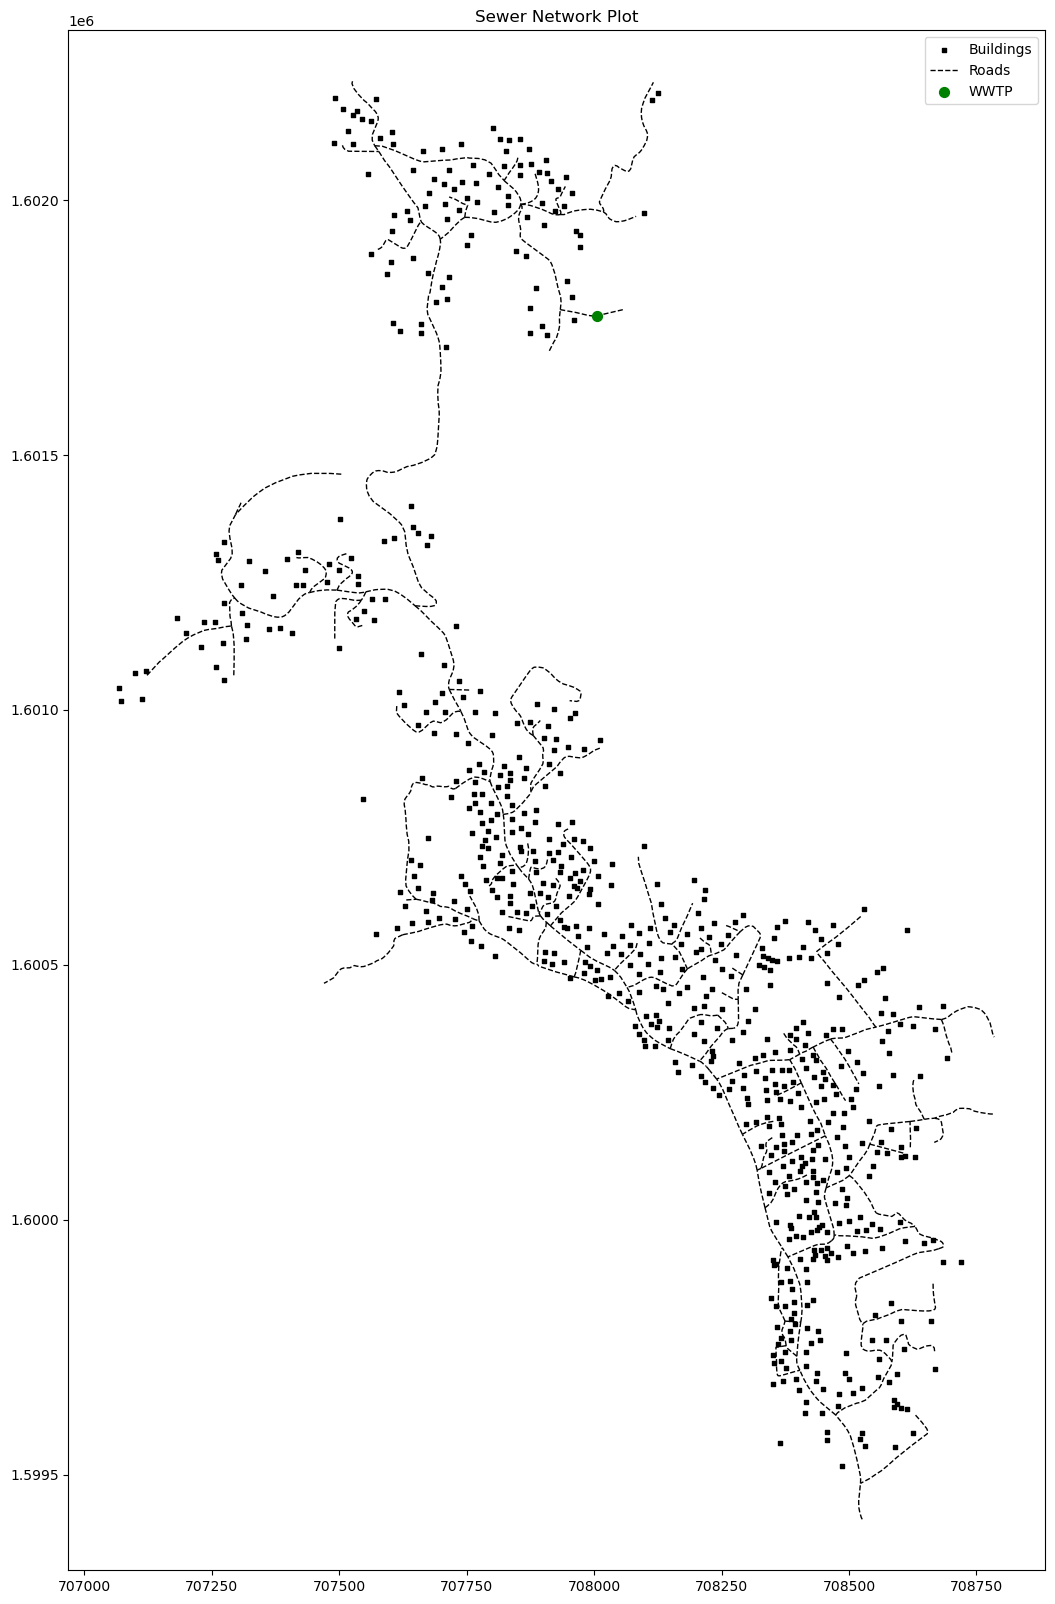

In [10]:
fig,ax = pysewer.plot_model_domain(test_model_domain,plot_sink=True)

# Routing Solver

In [11]:
layout = pysewer.rsph_tree(connection_graph,test_model_domain.get_sinks(),"building") 

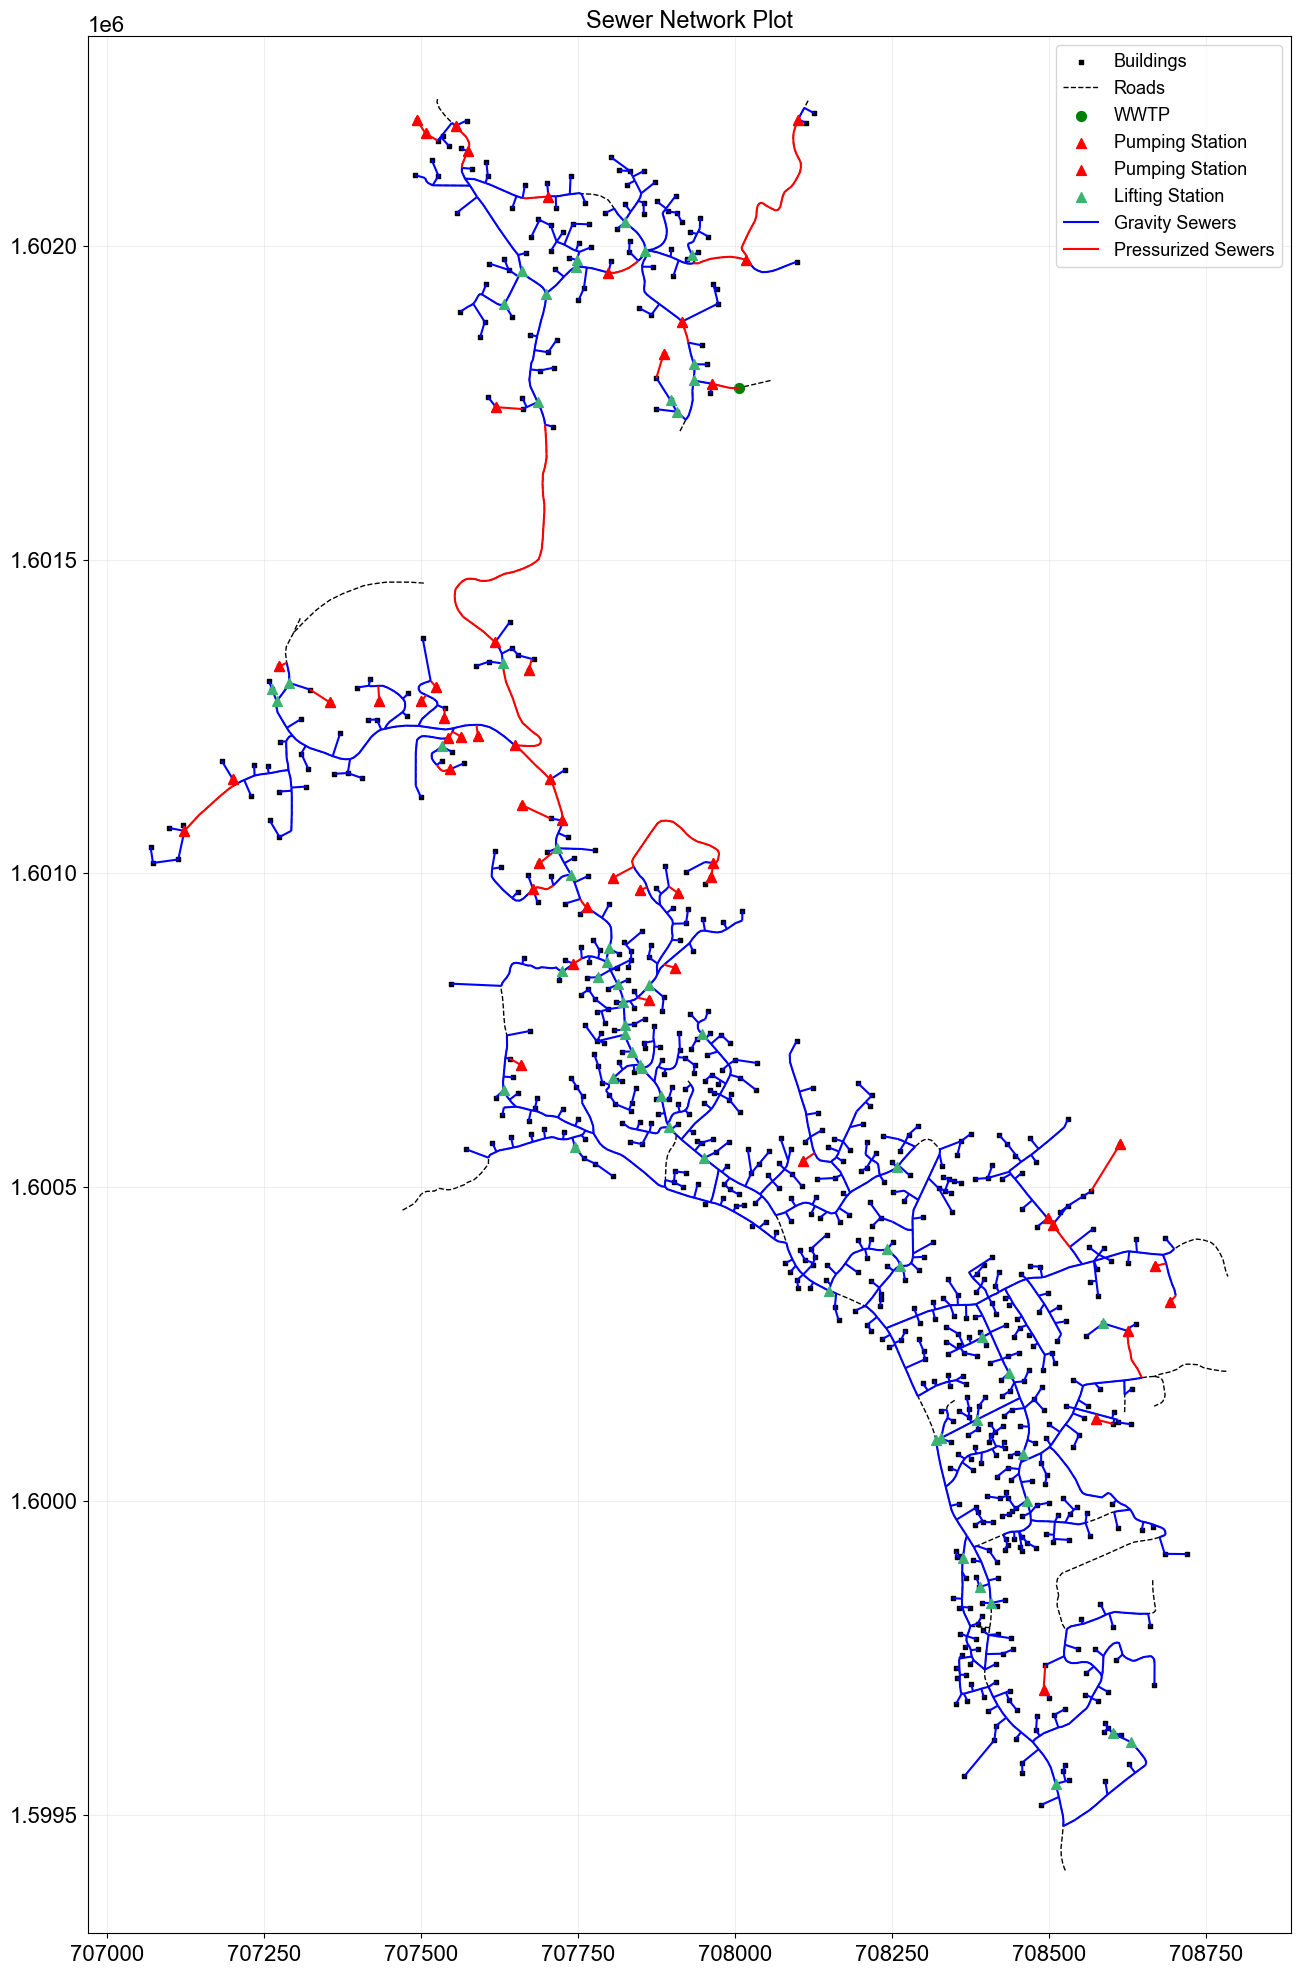

In [21]:
fig,ax = pysewer.plot_model_domain(test_model_domain, plot_sewer=True,sewer_graph = layout)
ax.grid(alpha=0.2)
fig.tight_layout()

# Pump optimization

0


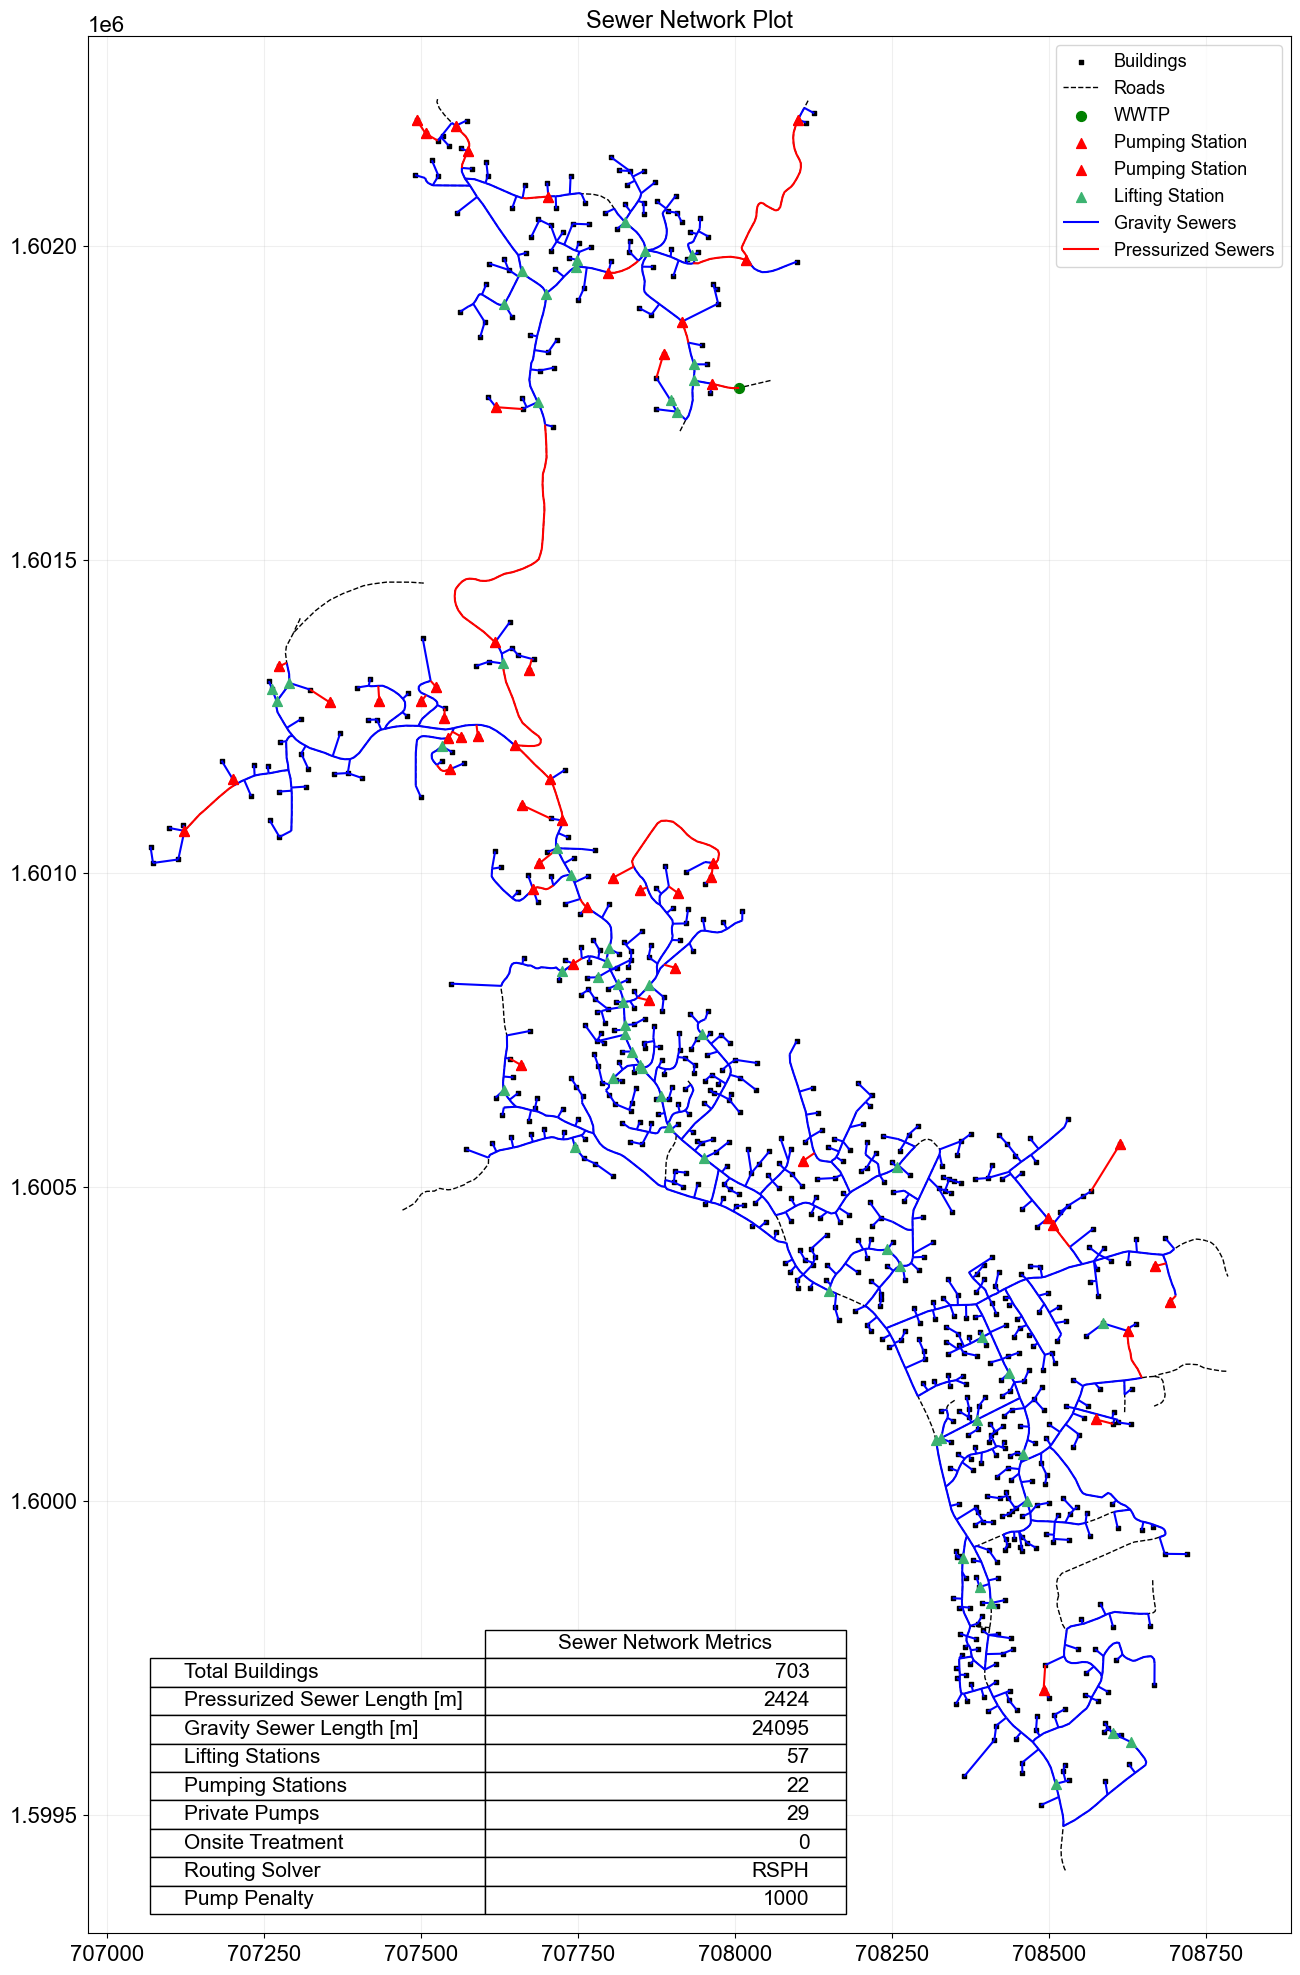

In [22]:
G = pysewer.estimate_peakflow(layout,inhabitants_dwelling=6,daily_wastewater_person=0.164)
G = pysewer.calculate_hydraulic_parameters(layout,sinks=test_model_domain.get_sinks(),diameters = pipe_diameters,pressurized_diameter=pressurized_diam,include_private_sewer=True,roughness = 0.012)
info = pysewer.get_sewer_info(G)
info["Routing Solver"] = "RSPH"
info["Pump Penalty"] = test_model_domain.pump_penalty
fig,ax = pysewer.plot_model_domain(test_model_domain, plot_sewer=True,sewer_graph = G, info_table=info)
# ax.set_xlim(689000, 691800)
# ax.set_ylim(2552500, 2557800)
   
ax.set_title("Sewer Network Plot")
ax.grid(alpha=0.2)
plt.legend(loc="upper right")
fig.tight_layout()
fig.savefig("./data/figures/optimized_sewer_network_area1.png",dpi=500)
plt.show()

/Users/despot/miniconda3/envs/pysewer/lib/python3.10/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


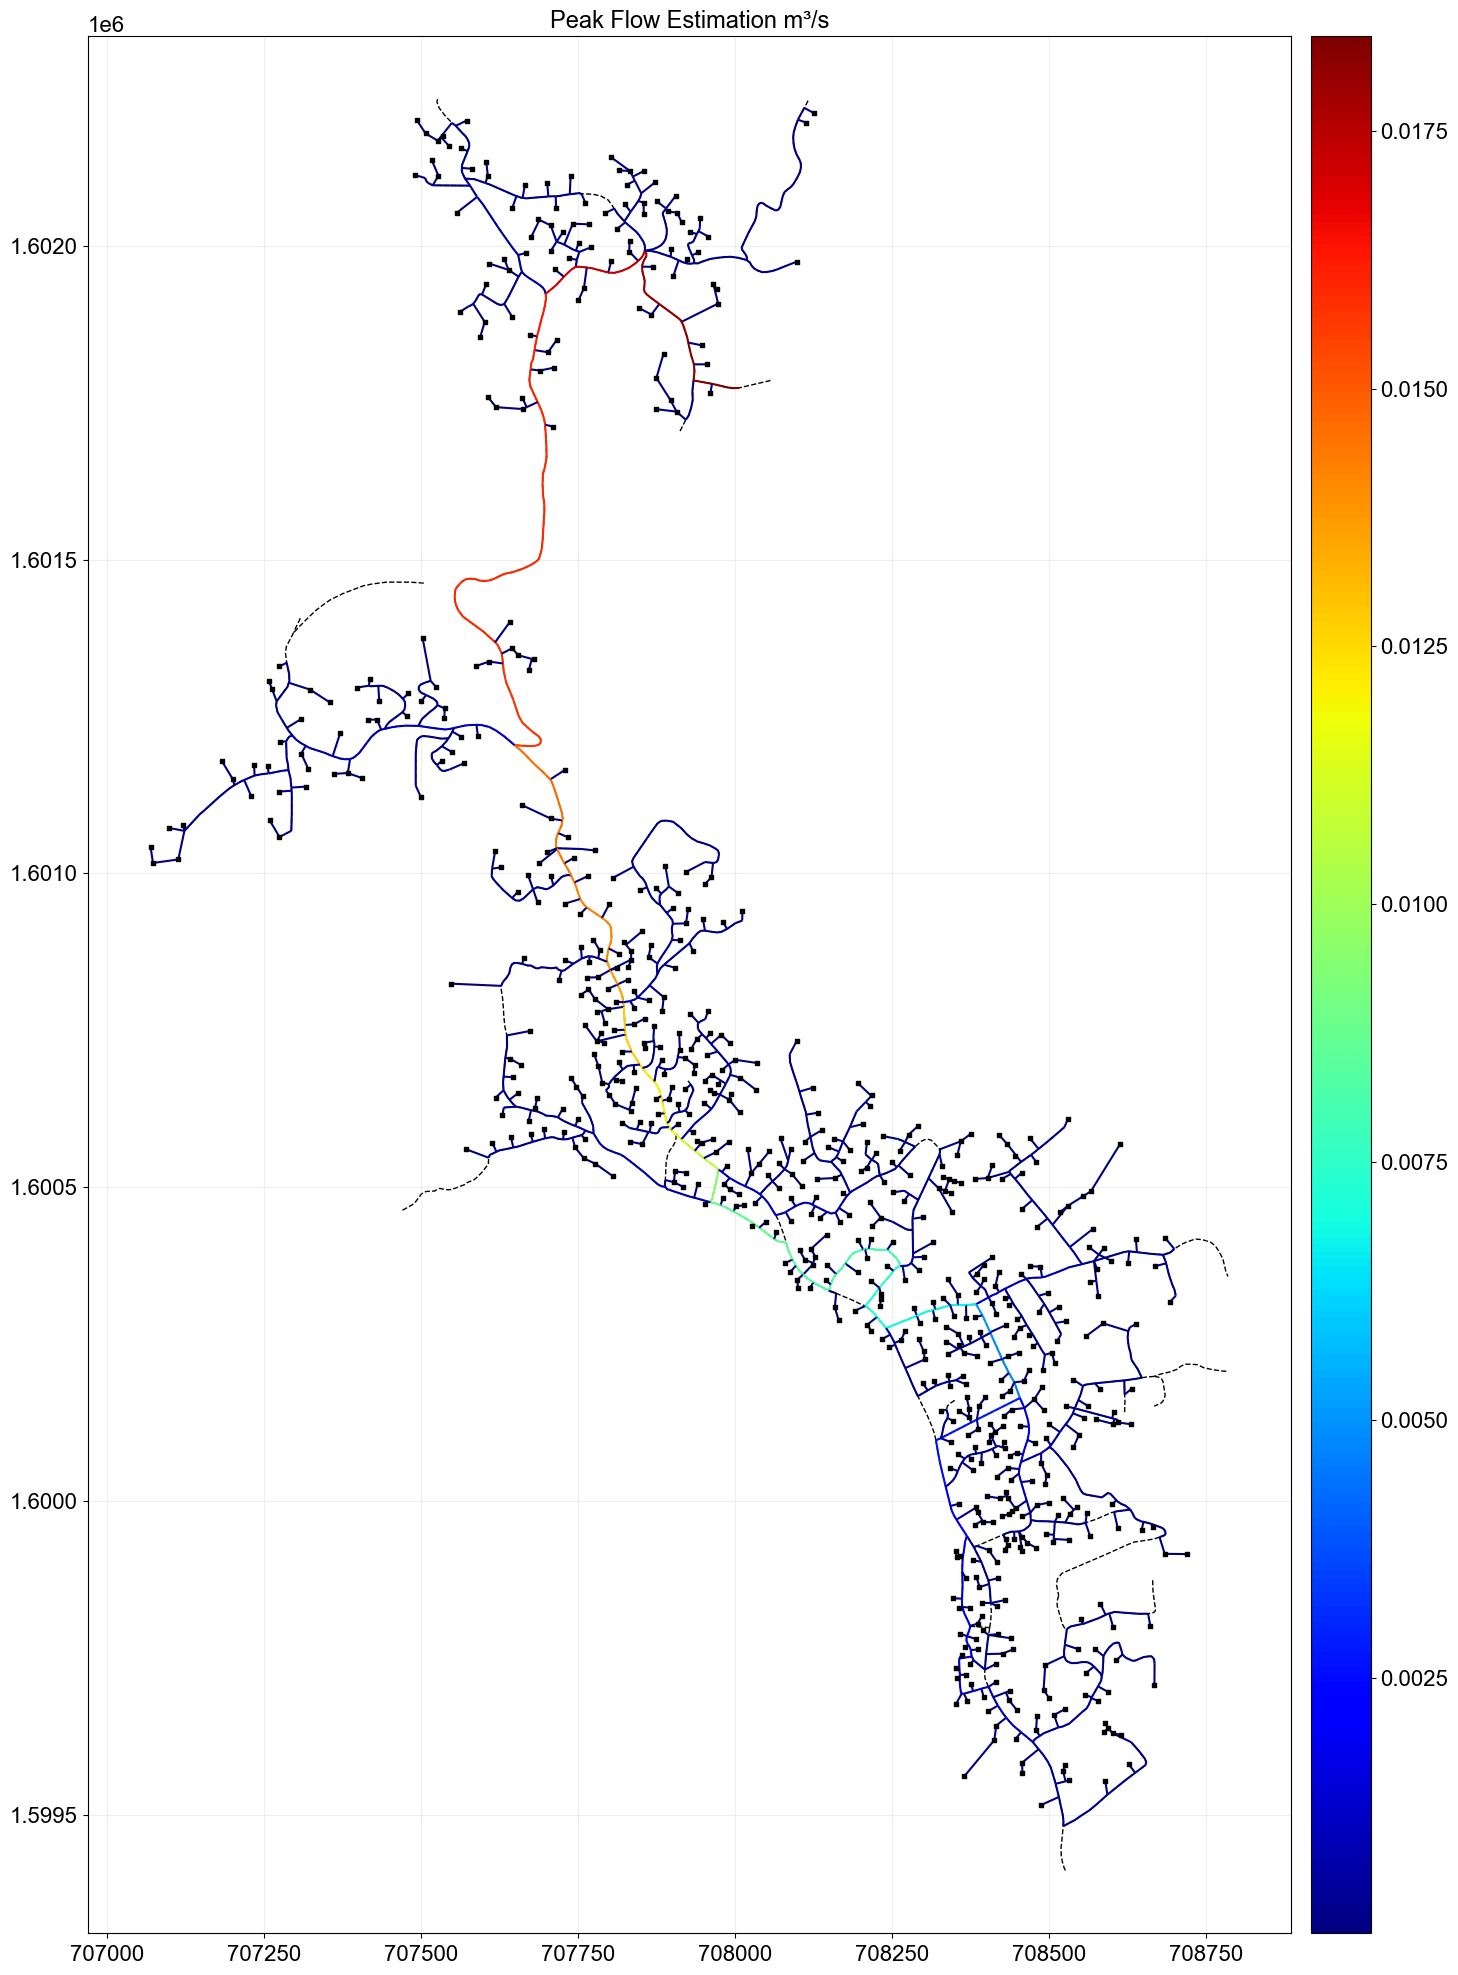

In [23]:
fig, ax  = pysewer.plot_sewer_attributes(test_model_domain,G,attribute="peak_flow",title="Peak Flow Estimation m³/s")
ax.grid(alpha=0.2)
fig.tight_layout()
fig.savefig("./data/figures/peak_flow_estimation_area1.png",dpi=500)
plt.show()

/Users/despot/miniconda3/envs/pysewer/lib/python3.10/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


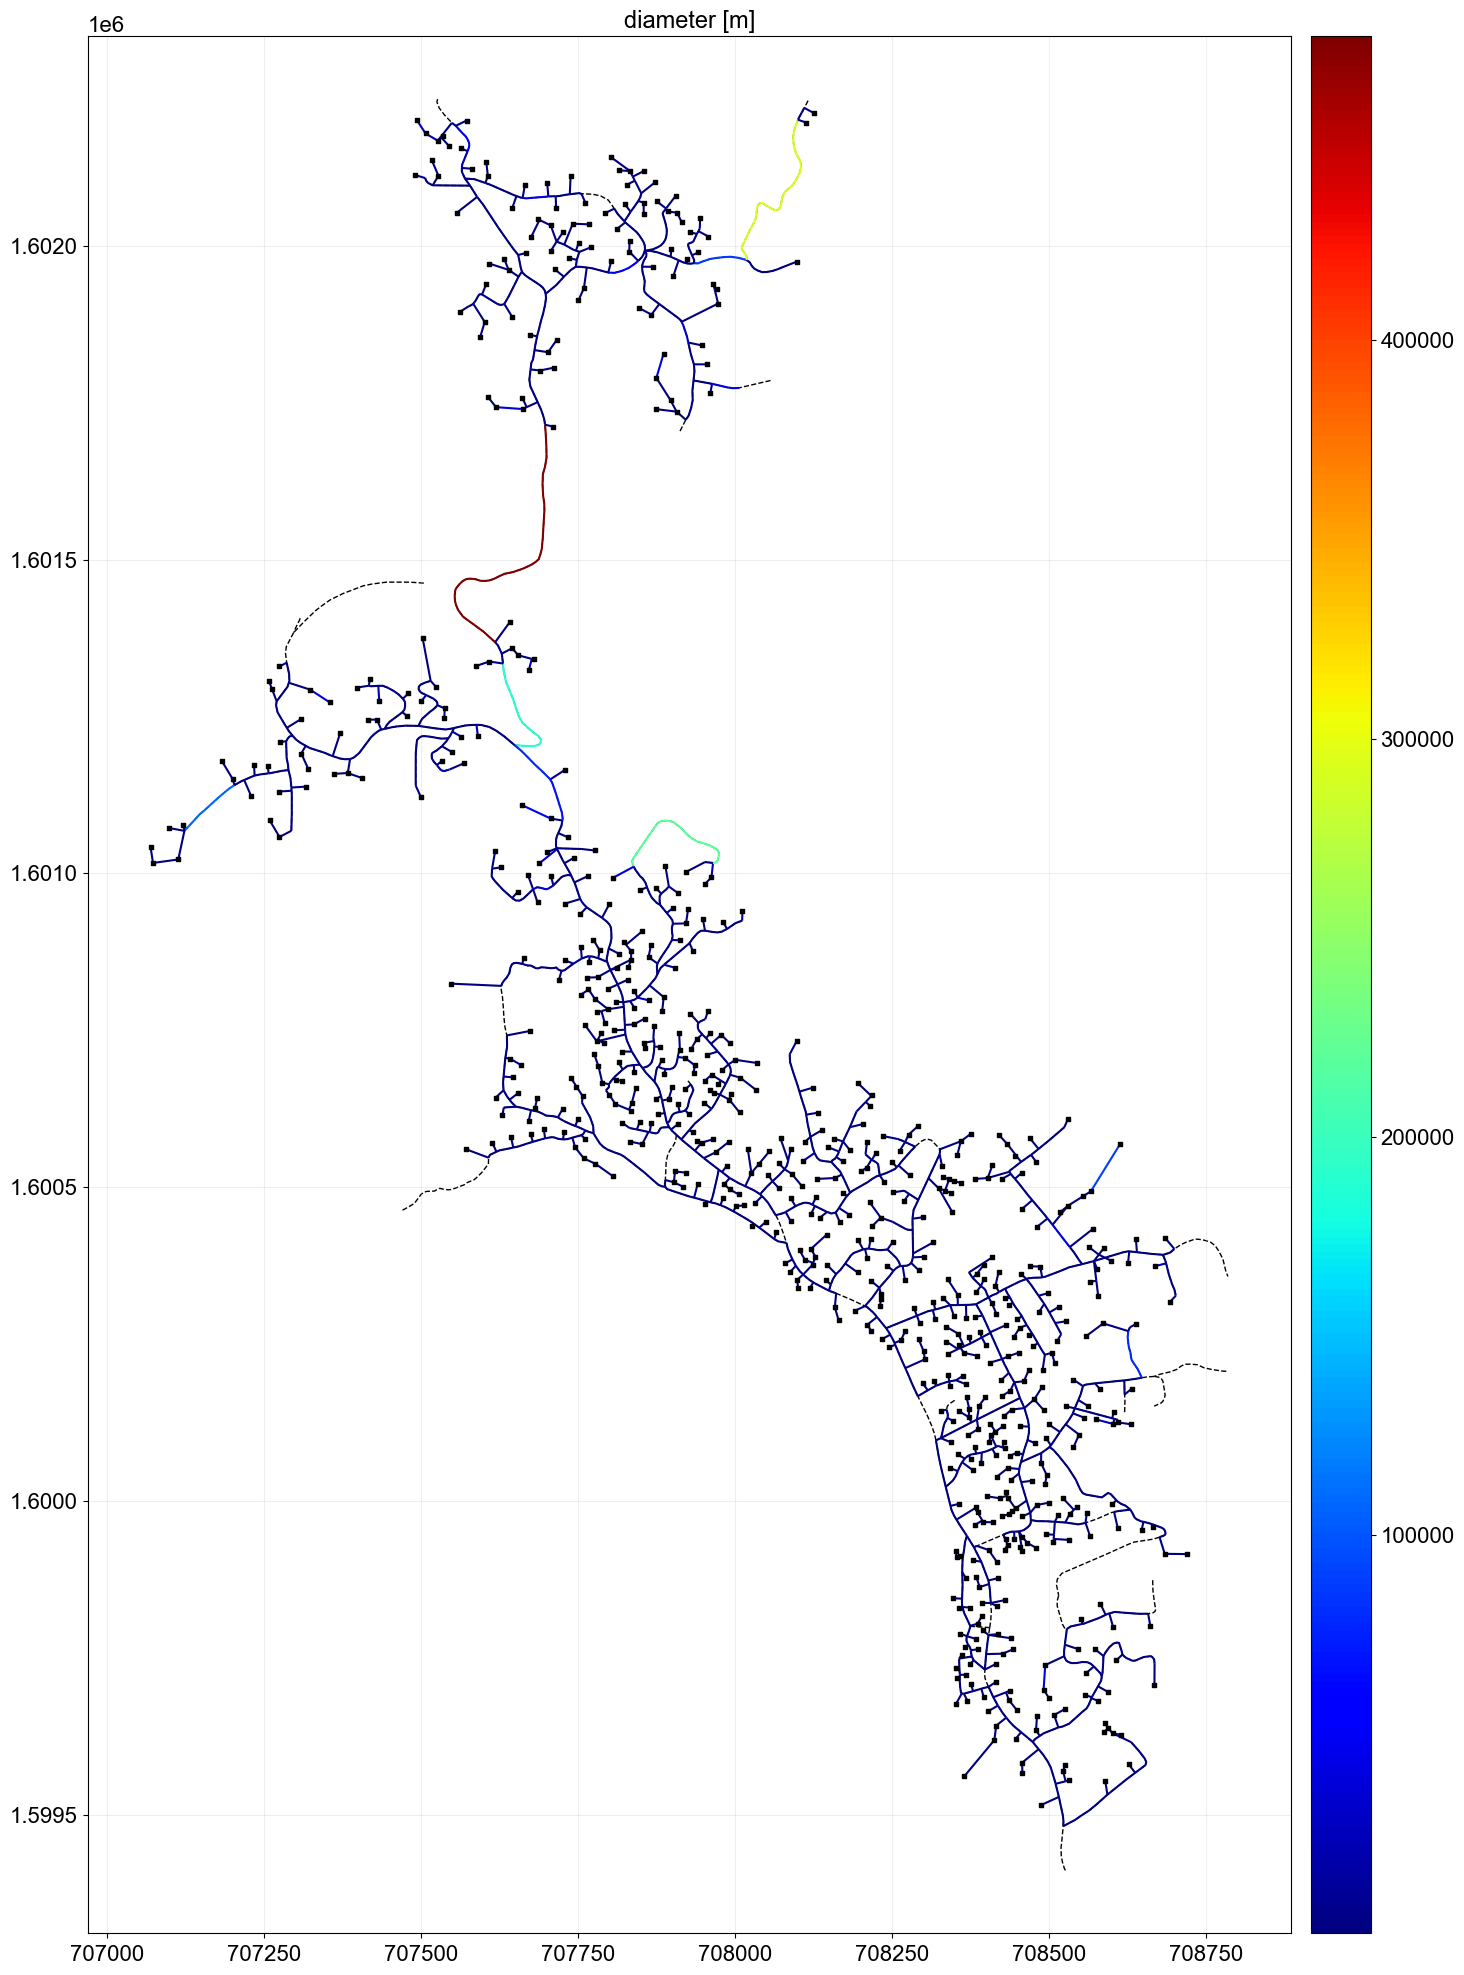

In [25]:
fig, ax = pysewer.plot_sewer_attributes(test_model_domain,G,attribute="weight",title="diameter [m]")
ax.grid(alpha=0.2)
fig.tight_layout()
fig.savefig("./data/figures/sewer_diameter_area1.png",dpi=500)
plt.show()

In [24]:
pysewer.get_edge_gdf(G, detailed=True).to_file("./data/processed/sewer_network_area1.gpkg",driver="GPKG")

SchemaError: Wrong field type for fid